In [ ]:
Lesson 11: Patterns Identification

In [ ]:
#K-Means Clustering Algorithm in Machine Learning

In [ ]:
"""
Algorithm
1. Choose your value of K  = 5 clusters or 5 groups
2. Randomly select K data points to represent the cluster centroids   Data  (13,12)   Centroid [(2,4)    (5,7)  (12,13)]
3. Assign all other data points to its nearest cluster centroids   eclidian distance
4. Reposition the cluster centroid until it is the average of the points in the cluster
5. Repeat steps 3 & 4 until there are no changes in each cluster

"""

In [54]:
# Importing the libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd # Importing the dataset 
import sklearn

In [55]:
#Now let’s import the dataset and 
dataset = pd.read_csv("C:\\_rwey\\pers\\projects\\training\\Mall_Customers.csv") 

In [56]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
type(df)

pandas.core.frame.DataFrame

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [59]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [60]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [61]:
#slice the important features Annual Income (k$) and Spending Score (1-100)
X = dataset.iloc[:, [3, 4]].values

In [62]:
type(X)

numpy.ndarray

In [63]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

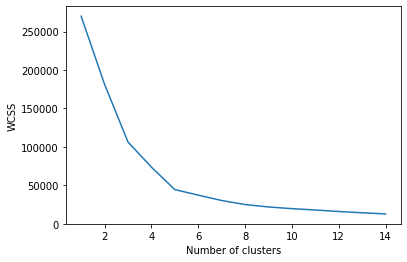

In [53]:
#We have to find the optimal K value for clustering the data.
#using the Elbow method.
from sklearn.cluster import KMeans
wcss = [] 

for i in range(1, 15): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
#“init” argument is the method for initializing the centroid. 
#We calculated the WCSS value for each K value. Now we have to plot the WCSS with K value

plt.plot(range(1, 15), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
#Plot data
plt.scatter(dataset['Annual Income (k$)'],['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending')
plt.show()

In [51]:
#The point at which the elbow shape is created is 5, that is, our K value or an optimal number of clusters is 5. 
#Now let’s train the model on the dataset with a number of clusters 5.
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

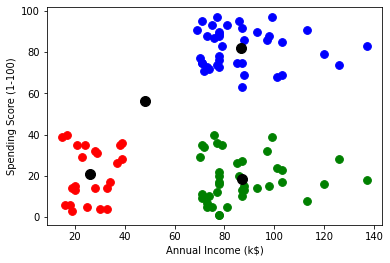

In [52]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
"""
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 60, c = 'blue', label = 'Cluster1')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 60, c = 'maroon', label = 'Cluster2')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], s = 60, c = 'yellow', label = 'Cluster5') 
"""
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
#plt.legend() 

plt.show()